## Logistic Regression and Gradient descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

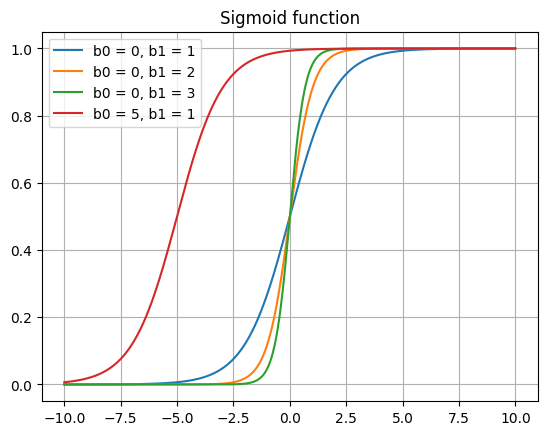

In [ ]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    p = 1 / (1 + np.exp(-(b0 + b1 * x)))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.grid()
plt.title('Sigmoid function')
plt.show()

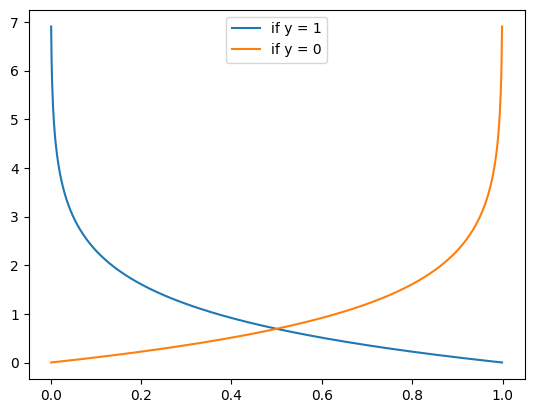

In [ ]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,7.2250,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,7.2250,C


In [ ]:
# removing name column
data = data.drop(['name'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# find and print the proportion of positive samples in data
print('% of positive samples in whole data:', sum(data['survived'] == 1) / len(data))

data_label = data.loc[:,"survived"]
data_feature = data.drop(['survived'], axis = 1)
# split data
x_train, x_test, y_train, y_test = train_test_split(data_feature,data_label, test_size=0.2)

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))

% of positive samples in whole data: 0.3819709702062643
% of positive samples in train set: 0.37822349570200575
% of positive samples in test set: 0.3969465648854962


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# caclulate and print metrics
print(f'Testing accuracy = {metrics.accuracy_score(y_test, y_test_pred)}')
print(f'Testing precision = {metrics.precision_score(y_test, y_test_pred)}')
print(f'Testing recall = {metrics.recall_score(y_test, y_test_pred)}')
print(f'Testing F1-score = {metrics.f1_score(y_test, y_test_pred)}')

In [ ]:
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

In [ ]:
# Thresholds for LR
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Probabilities of each sample from x_test
pred_proba = clf.predict_proba(x_test)

# Accuracy, precision, recall
results = [[],[],[]]
for i in thresholds:
    # Write your code here: if the element from pred_proba > threshold,
    # add 1 to y_test_pred_thr, otherwise add 0
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    # Compare y_test_pred_thr with y_test by metrics and add them to results
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')
plt.plot(thresholds, results[1], label = 'precision')
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

titanic_true_labels = np.array(y_test)
titanic_pred_labels = y_test_pred

print('Confusion Matrix for Titanic:\n', confusion_matrix(titanic_true_labels, titanic_pred_labels), '\n')

In seaborn this matrix is:

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(titanic_true_labels, titanic_pred_labels), annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

### <center> Gradient Descent: Losgistic regression with Numpy </center>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from IPython.display import clear_output

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

In [ ]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.show()

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(x):
    # return the sigmoid
    return 1/ (1 + np.exp(-x))

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In vector form:
$$ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} \textbf{X}^T * (h_{\theta}(\textbf{X}) - \textbf{y}) $$

where **X** - m by j input matrix, **y** - m by 1 target vector, * - [dot multiplication](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [ ]:
def compute_cost(theta, x, y):
    m = len(y)
    # aka h_theta(x^i)
    y_pred = sigmoid(np.dot(x , theta))
    # The part of J(theta) under the sum
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    # J(theta)
    cost = -1 / m * sum(error)
    # Compute in a vector form
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient # return the total error and the gradient

In [ ]:
### Plot the data with decision boundary
def plot_data_with_decision(data, labels, theta):
    colors = {0:"red", 1:'blue'}
    label_values = [0, 1]

    x_boundary = np.array([np.min(data[:, 1]), np.max(data[:, 1])])
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

    for i in label_values:
        idx = np.where(labels == i)
        plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
    plt.plot(x_boundary, y_boundary)
    plt.xlim([-2, 6])
    plt.show()

### Initialize the parameters of the hypothesis

In [ ]:
n_feature = data.shape[1]
n_samples = data.shape[0]

X = np.append(np.ones((n_samples, 1)), data, axis=1) #include intercept
y = labels.reshape(n_samples, 1)

theta = np.random.randn(n_feature+1).reshape(n_feature+1, 1) # initialize the weights (parameters)

print(f"Initial values of theta : {theta}")
cost, gradient = compute_cost(theta, X, y)
print(f"Initial gradient : {gradient}\nInitial cost {cost}")

plot_data_with_decision(data,labels, theta)

### Apply gradient descent to minimize the loss function

In [ ]:
costs = []
iterations = 300
lr = 0.01 # the learning rate
for i in range(iterations):
    cost, gradient = compute_cost(theta, X, y)
    theta -= (lr * gradient) # simultaneously update the parameters with thier respective gradients
    costs.append(cost)

### Plotting the Convergence of $J(\theta)$


In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")

### Plot the final decision boundary

In [ ]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.plot(x_boundary, y_boundary)
plt.show()

In [ ]:
def predict(theta, X):
    results = X.dot(theta)
    return results > 0.5

print(f"Accuracy: {metrics.accuracy_score(predict(theta, X), y)}")